<a href="https://colab.research.google.com/github/AkpuruenyaChukwu/A-B_Test_for_DeliveryApp/blob/main/A_and_B_testing_Hyperskill_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A/B testing project from [Hyperskill](https://hyperskill.org/courses)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy import stats
from statsmodels.stats.power import TTestIndPower
from scipy.stats import mannwhitneyu


### Levene and T tests

In [3]:
df_aa  = pd.read_csv('/content/drive/MyDrive/Data projects/aa_test.csv')

In [4]:
df_aa.head()

,Sample 1,Sample 2
0,38.74,42.74
1,34.79,38.79
2,43.83,47.83
3,38.82,42.82
4,36.84,40.84


In [5]:
df_aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sample 1  25 non-null     float64
 1   Sample 2  25 non-null     float64
dtypes: float64(2)
memory usage: 532.0 bytes


In [6]:
df_aa.describe()

,Sample 1,Sample 2
count,25.000000,25.000000
mean,34.921600,38.921600
std,4.121118,4.121118
min,25.800000,29.800000
25%,32.730000,36.730000
50%,35.100000,39.100000
75%,37.900000,41.900000
max,43.830000,47.830000


In [7]:
sample1 = df_aa["Sample 1"].values
sample2 = df_aa["Sample 2"].values

In [8]:
print(stats.levene(sample1, sample2, center = "mean"))

LeveneResult(statistic=np.float64(7.037131163899646e-31), pvalue=np.float64(1.0))


In [9]:
print(stats.levene(sample1, sample2))

LeveneResult(statistic=np.float64(0.0), pvalue=np.float64(1.0))


In [10]:
levene_test = stats.levene(sample1, sample2, center = "mean")

In [11]:
print(levene_test)

LeveneResult(statistic=np.float64(7.037131163899646e-31), pvalue=np.float64(1.0))


In [12]:
[np.var(x, ddof=1) for x in [sample1,sample2]]

[np.float64(16.983614), np.float64(16.983614)]

In [13]:
# Levene's test
# W = 0.084, p-value > 0.05
# Reject null hypothesis: no
# Variances are equal: yes

In [14]:
print("Levene's test")
print(f"W = {levene_test.statistic:.3f}, p-value > 0.05", )
print("Reject null hypothesis: yes")
print("Variances are equal: yes")


Levene's test
W = 0.000, p-value > 0.05
Reject null hypothesis: yes
Variances are equal: yes


In [15]:
t_value = stats.ttest_ind(sample1, sample2)
print(t_value)

TtestResult(statistic=np.float64(-3.4316259434139775), pvalue=np.float64(0.0012436935021634143), df=np.float64(48.0))


In [16]:
[np.mean(x) for x in [sample1,sample2]]

[np.float64(34.921600000000005), np.float64(38.921600000000005)]

In [17]:
# T-test
# t = 0.205, p-value > 0.05
# Reject null hypothesis: no
# Means are equal: yes

In [18]:
print("Levene's test")
print(f"W = {levene_test.statistic:.3f}, p-value > 0.05", )
print("Reject null hypothesis: yes")
print("Variances are equal: yes")
print("T-test")
print(f"W = {t_value.statistic:.3f}, p-value < 0.05", )
print("Reject null hypothesis: no")
print("means are equal: no")

Levene's test
W = 0.000, p-value > 0.05
Reject null hypothesis: yes
Variances are equal: yes
T-test
W = -3.432, p-value < 0.05
Reject null hypothesis: no
means are equal: no


### Sample size and power

In [19]:
df  = pd.read_csv(r"/content/drive/MyDrive/Data projects/ab_test.csv")

In [20]:
power = 0.80
effect = 0.2
alpha = 0.05
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
# print('Sample Size: %.3f' % result)
print("Sample size: ", int(round(result, -2)))
print()


Sample size:  400



In [21]:
print("Control group: ", df[df["group"] == "Control"].shape[0])
print("Experimental group: ", df[df["group"] == "Experimental"].shape[0])


Control group:  400
Experimental group:  400


### Perform EDA

In [22]:
df.head()

,session_id,group,date,session_duration,order_value
0,5aaffadb-eb83-455c-9754-a17fc82dd80e,Control,2021-06-01,14.55,4.51
1,c1bf8b62-2058-49f0-b888-042357895e9b,Experimental,2021-06-01,15.20,78.26
2,32c312b8-56e2-4f5a-ab67-23a0ea31ade5,Control,2021-06-01,11.13,31.32
3,682bd25f-bd8c-49d9-b097-cde08b07b6f5,Control,2021-06-01,16.17,19.92
4,d7c675dd-9213-42e1-b3b7-758957f3f466,Experimental,2021-06-01,13.85,9.53


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   session_id        800 non-null    object 
 1   group             800 non-null    object 
 2   date              800 non-null    object 
 3   session_duration  800 non-null    float64
 4   order_value       800 non-null    float64
dtypes: float64(2), object(3)
memory usage: 31.4+ KB


In [24]:
df["date"].describe()

,date
count,800
unique,13
top,2021-06-03
freq,78


In [25]:
df["date"].max()

'2021-06-13'

In [26]:
df["date"].min()

'2021-06-01'

In [27]:
df['day'] = (pd.to_datetime(df['date'])).dt.day
df['month'] = (pd.to_datetime(df['date'])).dt.month
df['year'] = (pd.to_datetime(df['date'])).dt.year

In [28]:
df_control = df[df["group"] == "Control"]
df_Experimental = df[df["group"] == "Experimental"]
print(df_control.columns)

Index(['session_id', 'group', 'date', 'session_duration', 'order_value', 'day',
       'month', 'year'],
      dtype='object')


In [29]:
df_control["day"].value_counts()

,count
day,
9,36
4,35
3,35
13,33
2,31
6,31
7,30
8,30
1,29


<Axes: xlabel='June', ylabel='Number of Sessions'>

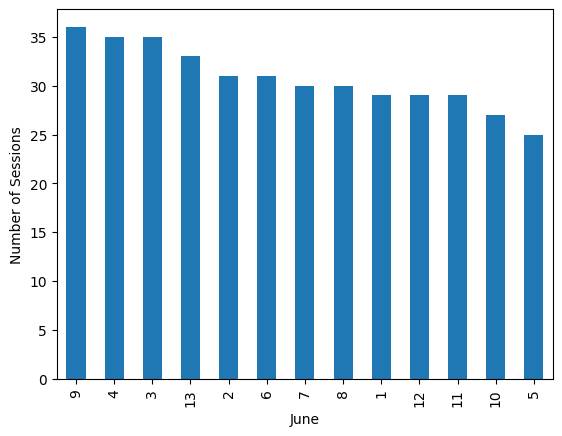

In [30]:
df_control["day"].value_counts().plot(kind = "bar", ylabel = "Number of Sessions", xlabel = "June")


<Axes: xlabel='June', ylabel='Number of Sessions'>

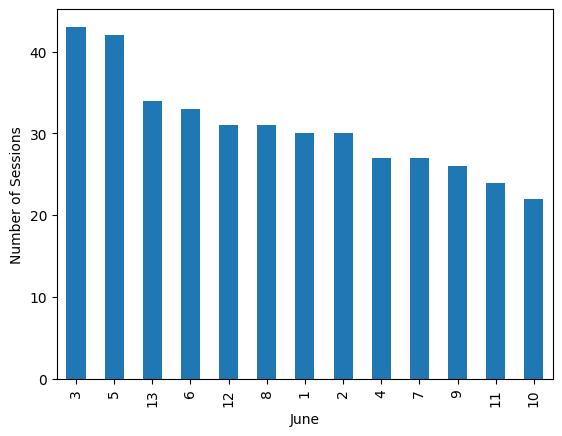

In [31]:
df_Experimental["day"].value_counts().plot(kind = "bar", ylabel = "Number of Sessions", xlabel = "June")

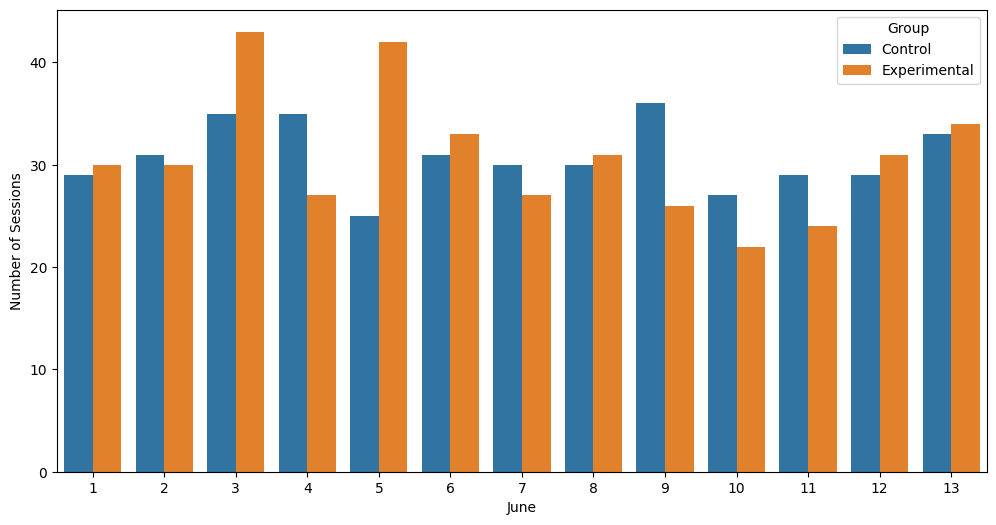

In [32]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day', hue='group')
plt.xlabel('June')
plt.ylabel('Number of Sessions')

plt.legend(title='Group')
plt.show()

In [33]:
df.columns
# df.head()
# df["session_id"].describe()


Index(['session_id', 'group', 'date', 'session_duration', 'order_value', 'day',
       'month', 'year'],
      dtype='object')

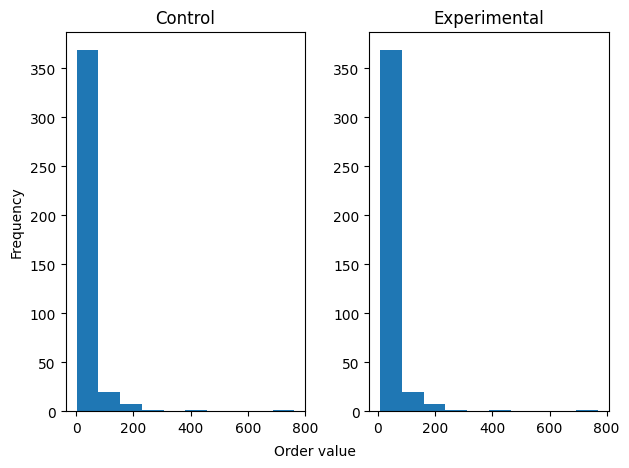

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.text(0.5, 0.04, 'Order value', ha='center')

axes[0].hist(df_control["order_value"])
axes[0].set_title("Control")
axes[1].hist(df_Experimental["order_value"])
axes[1].set_title("Experimental")
axes[0].set_ylabel("Frequency")


plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

In [35]:
df["order_value"].value_counts()

,count
order_value,
11.56,3
12.07,3
6.07,3
5.56,3
10.51,2
...,...
24.82,1
66.81,1
23.88,1


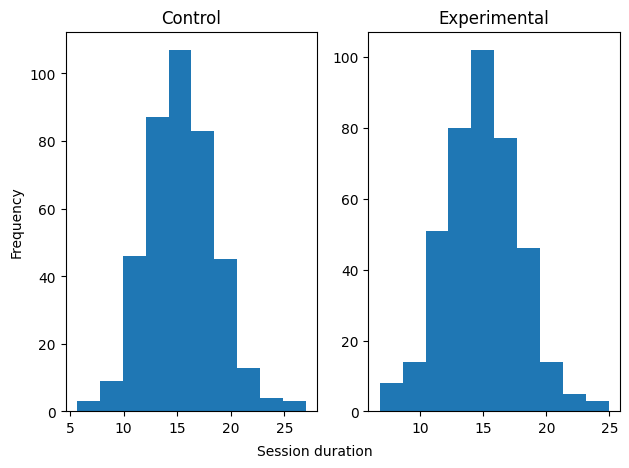

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.text(0.5, 0.04, 'Session duration', ha='center')

axes[0].hist(df_control["session_duration"])
axes[0].set_title("Control")
axes[1].hist(df_Experimental["session_duration"])
axes[1].set_title("Experimental")
axes[0].set_ylabel("Frequency")


plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

### Order Value outliers

In [37]:
df['order_value'].describe()

,order_value
count,800.000000
mean,37.607825
std,53.783835
min,1.300000
25%,13.270000
50%,24.480000
75%,43.680000
max,769.320000


In [38]:
Q1 = df['order_value'].quantile(0.25)
Q3 = df['order_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['order_value'] >= lower_bound) & (df['order_value'] <= upper_bound)]



df = df_filtered

In [39]:

upper_bound = 200
df_filtered = df[df['order_value'] <= upper_bound]



df = df_filtered

In [40]:
df_filtered['order_value'].describe()

,order_value
count,746.000000
mean,27.640241
std,18.833039
min,1.300000
25%,12.880000
50%,22.665000
75%,38.230000
max,88.560000


In [41]:
#Remove values above 99th percentile
df  = pd.read_csv(r"/content/drive/MyDrive/Data projects/ab_test.csv")
filter_order = np.percentile(df['order_value'], 99)
filter_session = np.percentile(df['session_duration'], 99)

df_filtered = df[(df["order_value"] <= filter_order) & (df["session_duration"] <= filter_session)]
df_filtered["order_value"].describe()


,order_value
count,784.000000
mean,33.746199
std,32.210903
min,1.300000
25%,13.247500
50%,23.965000
75%,42.322500
max,202.980000


In [42]:
df_filtered.shape[0]

784

In [43]:


Order_val = df_filtered["order_value"]
print(f"Mean: {Order_val.mean():.2f}")
print(f"Standard deviation: {Order_val.std(ddof=0):.2f}")
print(f"Max: {Order_val.max():.2f}")

Mean: 33.75
Standard deviation: 32.19
Max: 202.98


### Non-Parametric Tests

In [47]:
df_filtered_control = df_filtered[df_filtered["group"] == "Control"]
df_filtered_experimental = df_filtered[df_filtered["group"] == "Experimental"]
experiment_order = df_filtered_experimental["order_value"]
control_order = df_filtered_control["order_value"]



In [53]:
U1, p = mannwhitneyu(control_order, experiment_order)
print(U1)
print(p)

60612.0
3.1276924092722644e-07


In [ ]:
print("Mann-Whitney U test")
print(f"U1 = {U1}, p-value <= 0.05")
print("Reject null hypothesis: yes")
print("Distributions are same: no")

###Parametric tests


In [55]:
log_order = np.log(df_filtered['order_value'])
# print(log_order)


<Axes: >

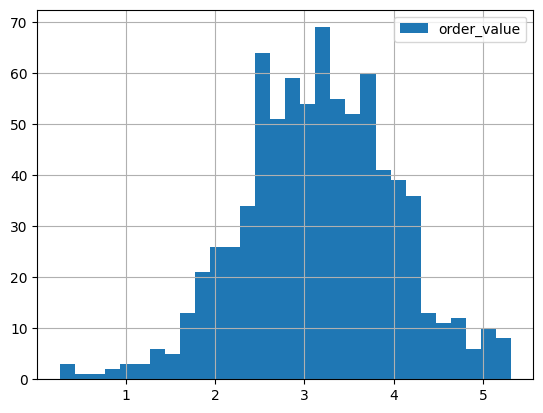

In [79]:
log_order.hist(bins = 30, legend = True)
plt.xlabel("log_order_value")
plt.ylabel("Frequency")
plt.show()

In [63]:
log_control_order = np.log(control_order)
log_experiment_order = np.log(experiment_order)


In [85]:
levene_test_order= stats.levene(log_control_order, log_experiment_order)

In [86]:
levene_test_order

LeveneResult(statistic=np.float64(30.1742577273089), pvalue=np.float64(5.344034488602514e-08))

In [65]:
[np.var(x, ddof=1) for x in [log_experiment_order,log_control_order]]

[0.49391875324515055, 0.9034238632215891]

In [87]:
t_value_order = stats.ttest_ind(log_control_order, log_experiment_order, equal_var=False)
print(t_value)

TtestResult(statistic=np.float64(-5.863072830110379), pvalue=np.float64(6.699745977302227e-09), df=np.float64(782.0))


In [88]:
[np.mean(x) for x in [log_experiment_order,log_control_order]]

[np.float64(3.340659838943713), np.float64(2.9907369873042473)]

In [90]:
print("Levene's test")
print(f"W = {levene_test_order.statistic:.3f}", "p-value <= 0.05")
print("Reject null hypothesis: yes")
print("Variances are equal: no")
print()
print("T-test")
print(f"t = {t_value_order.statistic:.3f}", "p-value <= 0.05")
print("Reject null hypothesis: yes")
print("Means are equal: no")

Levene's test
W = 30.174 p-value <= 0.05
Reject null hypothesis: yes
Variances are equal: no

T-test
t = -5.859 p-value <= 0.05
Reject null hypothesis: yes
Means are equal: no
